## Esercitazione del 20 Maggio 2025

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Esercizio 1

Scrivere un codice Python per l'addestramento di una rete MLP  per risolvere un problema di regressione. La rete ha la seguente architettura: un layer di input formato da un solo neurone e un layer di output formato da un solo neurone.

**Algoritmo di addestramento:**

Utilizzeremo l'algoritmo di ottimizzazione Batch Gradient Descent con passo di apprendimento learning_rate per aggiornare i pesi della rete durante l'addestramento.

## Descrizione del problema:

Consideriamo un dataset di coppie (x, y), dove x è un valore di input scalare e y è il valore di output desiderato. La rete MLP deve apprendere la relazione tra x e y in modo da poter prevedere y per nuovi valori di x.

-   Implementare la  funzione forward_propagation che calcola    l'output della rete per un dato input x.
-   Implementare la  funzione backward_propagation per calcolare il gradiente della funzione di perdita rispetto ai pesi della rete ed aggiornare i pesi con il metodo del  Gradient Descent.
       

    

Addestrare la rete:

-     Caricare un dataset di coppie (x, y).
-     Inizializzare i pesi della rete con valori casuali.
-     Iterare su un numero definito di epoche:
        Per ogni campione di training (x, y):
          -  Calcolare l'output previsto y_pred
             (forward_propagation).
        Calcolare l'errore MSE (np.mean(0.5*(y_pred - y)**2)
         -Calcolare il gradiente della funzione Costo
           rispetto ai pesi (backward_propagation).
         -Aggiornare i pesi della rete utilizzando
          l'algoritmo di Batch Gradient Descent.

   
-    Sperimentare con diversi valori di learning rate e numero di
     epoche per ottimizzare le prestazioni della rete.

-    Visualizzare il grafico della Cost-Function in funzione delle epoche

-    Usa la funzione di attivazione RELU.

Valutare le prestazioni della rete:
-    Su un set di dati di test e  Visualizzare i risultati ottenuti.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
seed=11
random.seed(seed)
np.random.seed(seed)

def relu(x):
  """

  Argomenti:
    x: Valore di input.

  Restituisce:
    Valore di output della funzione ReLU.
  """
  return np.where(x >= 0, x, 0)

def relu_derivative(x):
  """
  Funzione per calcolare la derivata vettoriale della funzione ReLU.

  Argomenti:
    x: Array di input.

  Restituisce:
    Array contenente la derivata della funzione ReLU per ogni elemento in x.
  """
  return np.where(x >= 0, 1, 0)


In [3]:
def forward_propagation(x, w, b):
    a = w * x + b
    z = relu(a)
    return z, a

In [4]:
def backward_propagation(y_pred, y, x, a, w, b, learning_rate):
    delta_1 = (y_pred - y) * relu_derivative(a)
    w = w - learning_rate * np.sum(delta_1 * x) / x.shape[0]
    b = b - learning_rate * np.sum(delta_1) / x.shape[0]
    return w, b

In [5]:
# Funzione costo
def mse(y_pred, y):
    return np.mean(0.5 * (y_pred - y)**2)

In [6]:
x = np.linspace(0.0, 10, 50)
y = 2 * x + 5 + 0.4 * np.random.normal(0, 2, 50)
w = np.random.randn()
b = np.random.randn()

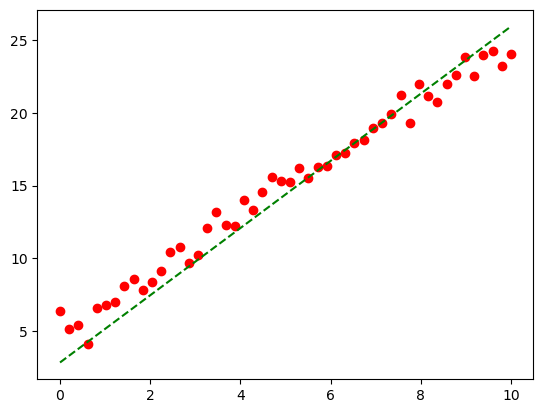

In [7]:
# Iperparametri
epochs = 5000
learning_rate = 0.0005
v_loss = []
# Addestramento del modello
for epoch in range(epochs):
    # Forward propagation
    y_pred, a = forward_propagation(x, w, b)
    loss = mse(y_pred, y)
    v_loss.append(loss)
    # Aggiornamento dei pesi e dei bias usando back-propagation e metodo del gradiente
    w, b = backward_propagation(y_pred, y, x, a, w, b, learning_rate)

# Predizione su nuovi dati
x_new = np.linspace(0, 10, 151)
y_pred_new, z = forward_propagation(x_new, w, b)
plt.plot(x, y, 'ro', x_new, y_pred_new, 'g--')
plt.show()

# Esercizio 2

Risolvere lo stesso problema cambiando l'architettura della rete:

La rete MLP avrà la seguente struttura:

    1 layer di input formato da un solo neurone che riceve il valore di x
    2 hidden layers ognuno formato da un solo neurone con funzione di attivazione ReLU
    1 layer di output formato da un solo neurone che produce il valore previsto di y

In [10]:
def forward_propagation(x, w, b):
    a1 = w[0] * x + b[0]
    z1 = relu(a1)
    
    a2 = w[1] * z1 + b[1]
    z2 = relu(a2)
    
    a3 = w[2] * z2 + b[2]
    z3 = relu(a3)

    return z3, a1, a2, a3, z1, z2

In [11]:
def backward_propagation(y_pred, y, w, b, a1, a2, a3, z1, z2, x, learning_rate, nT):
    delta_3 = (y_pred - y) * relu_derivative(a3)
    delta_2 = delta_3 * w[2] * relu_derivative(a2)
    delta_1 = delta_2 * w[1] * relu_derivative(a1)

    # Aggiornamento pesi
    w[2] = w[2] - learning_rate * np.sum(delta_3 * z2) / nT
    w[1] = w[1] - learning_rate * np.sum(delta_2 * z1) / nT
    w[0] = w[0] - learning_rate * np.sum(delta_1 * x) / nT

    # Aggiornamento bias
    b[2] = b[2] - learning_rate * np.sum(delta_3) / nT
    b[1] = b[1] - learning_rate * np.sum(delta_2) / nT
    b[0] = b[0] - learning_rate * np.sum(delta_1) / nT

    return w, b

In [61]:
x = np.linspace(0.0, 10, 50)
y = 2 * x + 5 + 0.4 * np.random.normal(0, 2, 50)
w = np.random.randn(3)
b = np.random.randn(3)

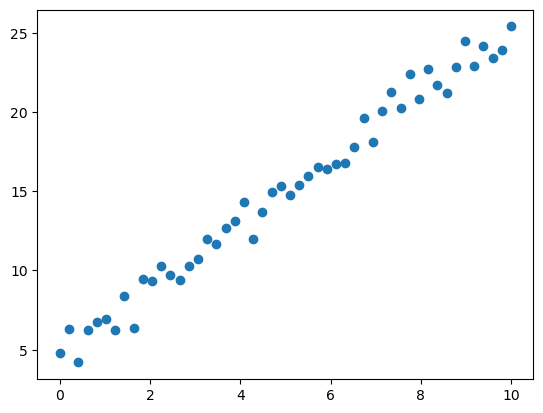

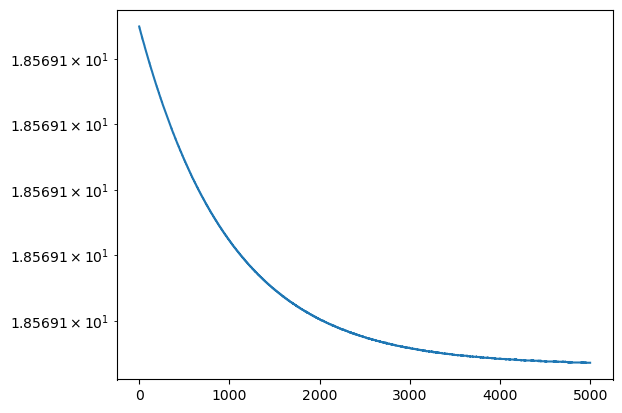

In [73]:
nT = x.shape[0]
f_loss_1 = []

for epoch in range(epochs):
    # Predizione
    y_pred, a1, a2, a3, z1, z2 = forward_propagation(x, w, b)
    
    # Calcolo la funzione costo
    loss = mse(y_pred, y)
    f_loss_1.append(loss)
    w, b = backward_propagation(y_pred, y, w, b, a1, a2, a3, z1, z2, x, learning_rate, nT)

# Predizione su nuovi dati
xnew = np.linspace(0, 0, 10, 100)
y_pred_new, a1, a2, a3, z1, z2 = forward_propagation(xnew, w, b)

plt.plot(x, y, 'o', xnew, y_pred_new, 'r-')
plt.show()
plt.semilogy(f_loss_1)
plt.show()